In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pylab 
import matplotlib.image as mpimg
%matplotlib qt
#use matplot lib inline show picture
%matplotlib inline


# prepare object points
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')


# Step through the list and search for chessboard corners
for fname in images:
    
    img = cv2.imread(fname)
    orgimg = img.copy()

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        drawn_img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

def undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist     

In [2]:
#images = glob.glob('camera_cal/calibration*.jpg')

#for fname in images:
    
   # img = cv2.imread(fname)
   # orgimg = img.copy()
   # img = undistort(img, objpoints, imgpoints)
   # f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
   # f.tight_layout()
   # ax1.imshow(orgimg) 
  #  ax1.set_title('Original Image', fontsize=50)
  #  ax2.imshow(img)
  #  ax2.set_title('undistort Image', fontsize=50)
  #  plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
import os
test_images = os.listdir("camera_cal/")
for img_name in test_images:
    
    print(img_name)
    path = 'camera_cal/'
    img = mpimg.imread(path+img_name)
    orgimg = img.copy()
    img = undistort(img, objpoints, imgpoints)
    path = 'output_images/'
    mpimg.imsave(path+img_name,img)


calibration17.jpg
calibration7.jpg
calibration10.jpg
calibration1.jpg
calibration19.jpg
calibration4.jpg
calibration16.jpg
calibration20.jpg
calibration13.jpg
calibration6.jpg
calibration11.jpg
calibration9.jpg
calibration18.jpg
calibration2.jpg
calibration12.jpg
calibration8.jpg
calibration15.jpg
calibration5.jpg
calibration14.jpg
calibration3.jpg


In [ ]:
def threshold(image):
    
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    R = imageRGB[:,:,0]
    thresh_r = (205, 255)
    binary_r = np.zeros_like(R)
    binary_r[(R > thresh_r[0]) & (R <= thresh_r[1])] = 1 
    
    hls = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    thresh_s = (130, 255)
    binary_s = np.zeros_like(S)
    binary_s[(S > thresh_s[0]) & (S <= thresh_s[1])] = 1
    
    thresh_h = (20, 100)
    binary_h = np.zeros_like(H)
    binary_h[(H > thresh_h[0]) & (H <= thresh_h[1])] = 1
    
    thresh_l = (120, 255)
    binary_l = np.zeros_like(L)
    binary_l[(L > thresh_l[0]) & (L <= thresh_l[1])] = 1
    
    sobel_kernel=7
    thresh=(0.5, 3)
    gray = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2GRAY)
    abs_sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    grad_sobel = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(grad_sobel)
    binary_output[(grad_sobel>=thresh[0])&(grad_sobel<=thresh[1])]=1
    
    thresh_min=40
    thresh_max=255
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    binary_outputx = np.zeros_like(scaled_sobelx)
    binary_outputx[(scaled_sobelx>= thresh_min)&(scaled_sobelx<=thresh_max)]=1
    
    mag_thresh=(50, 100)
    abs_sobelxy = np.sqrt(abs_sobelx**2 + abs_sobely**2)
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    binary_outputxy = np.zeros_like(scaled_sobelxy)
    binary_outputxy[(scaled_sobelxy>=mag_thresh[0])&(scaled_sobelxy<=mag_thresh[1])]=1
    
    #combine s channel and r channel
    combined_binary = np.zeros_like(binary_s)
    combined_binary[((binary_s == 1) & (binary_l == 1))|(binary_r == 1) |(binary_outputx==1)|(binary_h==1)] = 1

    return binary_s, binary_h, binary_r, binary_output, binary_outputx, binary_outputxy, combined_binary, binary_l

def combined_threshold(image):
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    R = imageRGB[:,:,0]
    thresh_r = (205, 255)
    binary_r = np.zeros_like(R)
    binary_r[(R > thresh_r[0]) & (R <= thresh_r[1])] = 1 
    
    hls = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    thresh_s = (130, 255)
    binary_s = np.zeros_like(S)
    binary_s[(S > thresh_s[0]) & (S <= thresh_s[1])] = 1
    
    thresh_h = (20, 100)
    binary_h = np.zeros_like(H)
    binary_h[(H > thresh_h[0]) & (H <= thresh_h[1])] = 1
    
    thresh_l = (120, 255)
    binary_l = np.zeros_like(L)
    binary_l[(L > thresh_l[0]) & (L <= thresh_l[1])] = 1
    
    sobel_kernel=7
    thresh=(0.5, 3)
    gray = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2GRAY)
    abs_sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    grad_sobel = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(grad_sobel)
    binary_output[(grad_sobel>=thresh[0])&(grad_sobel<=thresh[1])]=1
    
    thresh_min=40
    thresh_max=255
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    binary_outputx = np.zeros_like(scaled_sobelx)
    binary_outputx[(scaled_sobelx>= thresh_min)&(scaled_sobelx<=thresh_max)]=1
    
    mag_thresh=(50, 100)
    abs_sobelxy = np.sqrt(abs_sobelx**2 + abs_sobely**2)
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    binary_outputxy = np.zeros_like(scaled_sobelxy)
    binary_outputxy[(scaled_sobelxy>=mag_thresh[0])&(scaled_sobelxy<=mag_thresh[1])]=1
    
    #combine s channel and r channel
    combined_binary = np.zeros_like(binary_s)
    combined_binary[((binary_s == 1) & (binary_l == 1))|(binary_r == 1) |(binary_outputx==1)|(binary_h==1)] = 1
    
    return combined_binary
    
    

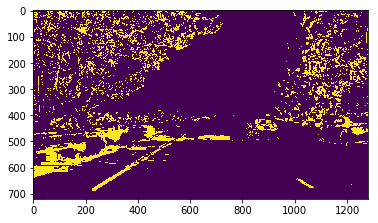

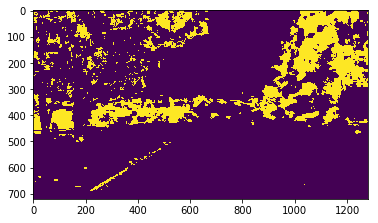

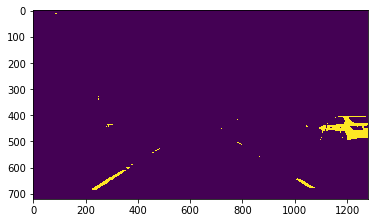

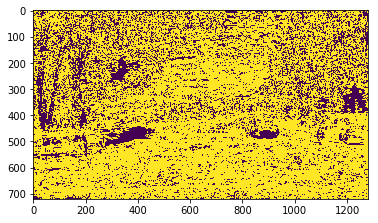

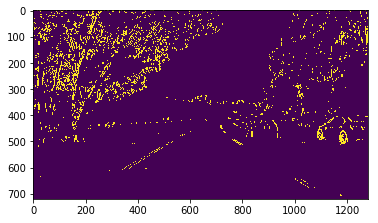

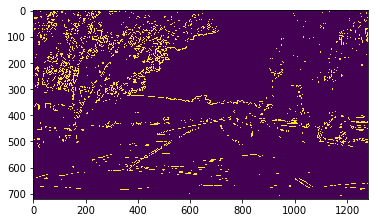

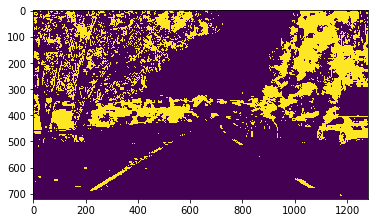

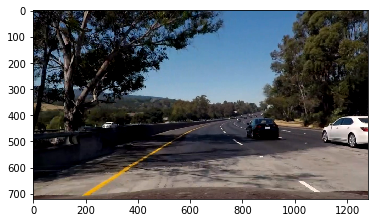

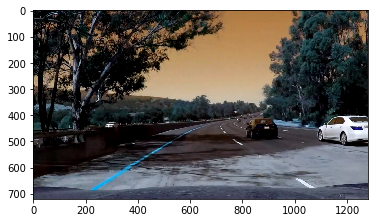

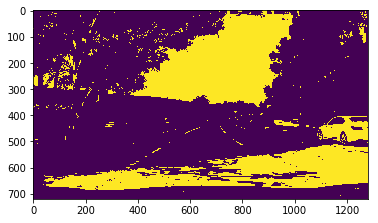

In [9]:
img = cv2.imread('images/test7.jpg')
orgimg = img.copy()
orgimg = undistort(orgimg, objpoints, imgpoints)
imgs, imgh, imgr, imgsobel, imgsobelx, imgsobelxy, imgcombined, img_l = threshold(img)
plt.imshow(imgs)
plt.show()
path = 'output_images/S Channel.jpg'
mpimg.imsave(path,imgs)
plt.imshow(imgh)
plt.show()
plt.imshow(imgr)
plt.show()
plt.imshow(imgsobel)
plt.show()
plt.imshow(imgsobelx)
plt.show()
plt.imshow(imgsobelxy)
plt.show()
plt.imshow(imgcombined)
orgimg = cv2.cvtColor(orgimg, cv2.COLOR_BGR2RGB)
plt.show()
path = 'output_images/imgcombined.jpg'
mpimg.imsave(path,imgcombined)
plt.imshow(orgimg)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(img_l)







In [4]:
def warp(img):   
    src = np.float32(
      [[300,720],
      [1080,720],
      [720,450],
      [600,450]])
#vertices=np.array([[(330,660),(1050,660),(720,450),(600,450)]],dtype=np.int32)
#cv2.fillPoly(orgimg, vertices, 255*3)
    dst = np.float32(
      [[400,720],
      [900,720],
      [900,0],
      [400,0]])
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

def region_of_interest(img, vertices):
 
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

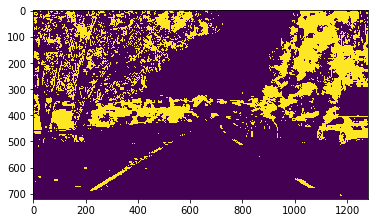

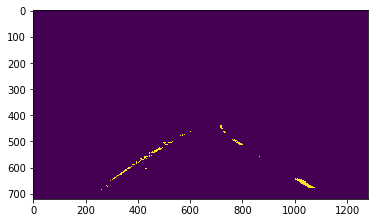

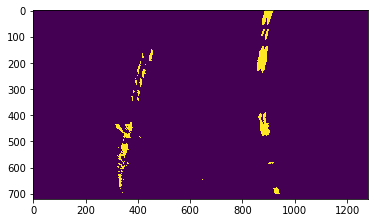

In [10]:
plt.imshow(imgcombined)
plt.show()
vertices=np.array([[(200,720),(600,425),(700,425),(1150,720)]],dtype=np.int32)
mask_img = region_of_interest(imgcombined, vertices)
plt.imshow(mask_img)
plt.show()
warpedimg = warp(mask_img)
plt.imshow(warpedimg)
plt.show()
path = 'output_images/warpedimg.jpg'
mpimg.imsave(path,warpedimg)


In [5]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftpoint = midpoint-150
    rightpoint = midpoint+150
    leftx_base = np.argmax(histogram[:leftpoint])
    rightx_base = np.argmax(histogram[rightpoint:]) + rightpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
       
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
       
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:

        left_lane_inds = np.concatenate(left_lane_inds)

        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:

        pass
 

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]


    return leftx, lefty, rightx, righty, out_img, left_lane_inds, right_lane_inds


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img, left_lane_inds, right_lane_inds= find_lane_pixels(binary_warped)
    
    if len(leftx)==0 or len(lefty)==0:
        left_fit = None
    else:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx)==0 or len(righty)==0:
        right_fit = None
    else:
        right_fit = np.polyfit(righty, rightx, 2)
    
        ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
      
     #Visualization ##
  #   Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

     #Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    
 #   plt.imshow(out_img)
 #   plt.show()
  #  path = 'output_images/fit_polynomial.jpg'
   # mpimg.imsave(path,out_img)


    

    
    return left_fit, right_fit, left_lane_inds, right_lane_inds

In [6]:
def rewarp(img):    
    dst = np.float32(
      [[300,720],
      [1080,720],
      [720,450],
      [600,450]])
#vertices=np.array([[(330,660),(1050,660),(720,450),(600,450)]],dtype=np.int32)
#cv2.fillPoly(orgimg, vertices, 255*3)
    src = np.float32(
      [[400,720],
      [900,720],
      [900,0],
      [400,0]])
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

In [7]:
def search_around_poly(binary_warped, left_fit, right_fit):

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])

    try:
        
        left_fitx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
        right_fitx = right_fit[0]*ploty**2+right_fit[1]*ploty+right_fit[2]
 
    except TypeError:
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 +1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    
    margin = 50

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    newleft_fit = np.polyfit(lefty, leftx, 2)
    newright_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

    try:
        left_fitx = newleft_fit[0]*ploty**2 + newleft_fit[1]*ploty + newleft_fit[2]
        right_fitx = newright_fit[0]*ploty**2 + newright_fit[1]*ploty + newright_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        
        
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    #Plot the polynomial lines onto the image
  #  plt.plot(left_fitx, ploty, color='yellow')
   # plt.plot(right_fitx, ploty, color='yellow')
   # plt.imshow(result)
  #  plt.show()
   # path = 'output_images/search_around_poly.jpg'
   # mpimg.imsave(path,result)
        
    return newleft_fit, newright_fit, left_lane_inds, right_lane_inds

def draw(binary_warped, left_fit, right_fit):
    img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )

    try:
        
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
   
    left_line = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    right_line = np.array([np.flipud(np.transpose(np.vstack([right_fitx, 
                              ploty])))])
    lane_line = np.hstack((left_line, right_line))
    cv2.fillPoly(img, np.int_([lane_line]), (0,255, 0))

    return img

def measure_curvature_position_real(img, left_fit, right_fit, left_lane_inds, right_lane_inds):
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension  
   
    ploty = np.linspace(0, 719, num=720)
        
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    
  
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
     
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    curverad = (left_curverad + right_curverad)/2
    
    imgcenter = img.shape[1]/2
    #leftx02 = left_fit_cr[0]*ymax**2 + left_fit_cr[1]*ymax + left_fit_cr[2]
    
    left_x = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
   # print(leftx02)
   # print(leftx0)
    right_x = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    center = (sum(left_x)/len(left_x)+sum(right_x)/len(right_x))/2
    diff_center = (imgcenter - center)*xm_per_pix

                            
    return curverad, diff_center

In [8]:
class DrawLane():
    def __init__(self):
        self.detection = False
        self.averagefit = None
        self.fit = []
        self.diff_fit = np.array([0,0,0], dtype='float') 
    def judge(self, fit):
        if fit is None:
            self.detection = False
            if self.averagefit is None:
                

                fit = self.fit
                self.fit.append(fit)
            else:
                fit = self.averagefit
                self.fit.append(self.averagefit)
            
        else:
            self.detection = True
            self.fit.append(fit)
            if self.averagefit is not None:
                        
                self.diff_fit = abs(self.averagefit-fit)
                if self.diff_fit [2] > 80 or self.diff_fit[1] > 1:                    
                    self.detection = False
                    fit = self.averagefit
                    self.fit.append(self.averagefit)
                                           
                else:
                    self.detection = True
                    self.fit.append(fit)
        if len(self.fit)>3:
                
            self.fit = self.fit[len(self.fit)-3:]
        if len(self.fit) == 3:
            self.averagefit = (self.fit[2]*5+self.fit[1]*3+self.fit[0]*2)/10 
                            
        return fit

        

In [9]:
def process_image(img):
    global leftfit, rightfit
    
    orgimg = img.copy()
    
    img = undistort(img, objpoints, imgpoints)
   
    rs_binary = combined_threshold(img)
    vertices=np.array([[(200,720),(600,425),(700,425),(1150,720)]],dtype=np.int32)
    mask_img = region_of_interest(rs_binary, vertices)

    warpedimg = warp(mask_img)
 
    if not left_line.detection or not right_line.detection:
        leftfit, rightfit, left_lane_inds, right_lane_inds= fit_polynomial(warpedimg)
        curivature, diff_center = measure_curvature_position_real(warpedimg, leftfit, rightfit, left_lane_inds, right_lane_inds)
                
    else:
        
        leftfit, rightfit, left_lane_inds, right_lane_inds= search_around_poly(warpedimg, leftfit, rightfit)
        curivature, diff_center = measure_curvature_position_real(warpedimg, leftfit, rightfit, left_lane_inds, right_lane_inds)
              
    leftfit = left_line.judge(leftfit)
    rightfit = right_line.judge(rightfit)
     
    drawimg =draw(warpedimg, leftfit, rightfit)

    out_img = rewarp(drawimg)
    out_img = cv2.addWeighted(orgimg, 1, out_img, 0.5, 0.0)
    text = 'Radius of Curvature = : ' + '{:04.2f}'.format(curivature) + 'm'
    cv2.putText(out_img, text, (30,70), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
    
    abs_diff_center = abs(diff_center)
    if diff_center > 0:
        text = 'Vehicle is {:04.3f}'.format(abs_diff_center) + 'm right of center'
        cv2.putText(out_img, text, (30,120), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
    elif diff_center < 0:

        text = 'Vehicle is {:04.3f}'.format(abs_diff_center) + 'm left of center'
        cv2.putText(out_img, text, (30,120), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)
    else:
        text = 'Vehicle is on the center of lane'
        cv2.putText(out_img, text, (30,120), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255,255,255), 2, cv2.LINE_AA)

 #   path = 'output_images/lane.jpg'
 #   mpimg.imsave(path,out_img)   
  
    return out_img    


  
    

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

left_line = DrawLane()
right_line = DrawLane()
white_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(35,50)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [22]:
HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [272]:
left_line = DrawLane()
right_line = DrawLane()
challenge_output = 'challenge_video_output.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image).subclip(2,15) #NOTE: this function expects color images!!
%time white_clip.write_videofile(challenge_output, audio=False)

SyntaxError: invalid syntax (<ipython-input-272-bf57c720758d>, line 4)

In [ ]:
HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(challenge_output))